### Fisher Forecast with velocity angular power spectrum of Type Ia supernovae

In this notebook we will obtain a Fisher matrix by autodiff with jax-cosmo

In [17]:
%matplotlib inline 
import jax
import jax_cosmo as jc
import jax.numpy as jnp # any numpy function will be JAX-accelerted and differentiable
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas as pd

#### Functions

In [13]:
#plotting function

def plot_contours(fisher, pos, nstd=1., ax=None, **kwargs):
    """"
    Plot 2D parameter contours given a Hessian matrix of the likelihood
    """
    
    def eigsorted(cov):
        vals, vecs = linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:, order]

    mat = fisher
    cov = jnp.linalg.inv(mat)
    sigma_marg = lambda i: jnp.sqrt(cov[i, i])

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = degrees(np.arctan2(*vecs[:, 0][::-1]))

    # Width and height are "full" widths, not redius
    width, height = 2 * nstd * sqrt(vals)
    ellip = Ellipse(xy=pos, width=width,
                        height=height, angle=theta, **kwargs)
    
    ax.add_artist(ellip)
    sz = max(width, height)
    s1 = 1.5 * nstd * sigma_marg(0)
    s2 = 1.5 * nstd * sigma_marg(1)
    ax.set_xlim(pos[0] - s1, pos[0] + s1)
    ax.set_ylim(pos[0] - s2, pos[1] + s2)
    plt.draw()
    return ellip

#### Cosmology

In [14]:
# Create a cosmology with default parameters
cosmology = jc.Planck15()

#### Redshit Distribution

Text(0, 0.5, '# of SNe that pass cuts')

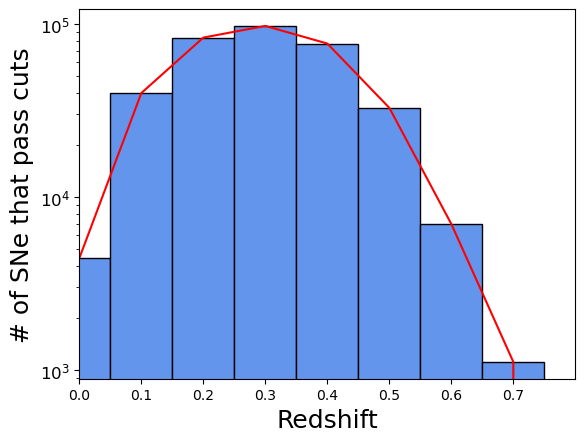

In [45]:
#open file

arquivo = open('/Users/joaopedrobonifacio/Documents/lib/python/Peculiar_Velocities_Cells/z_distribution.csv', 'r')
data = pd.read_csv(arquivo, sep=',', header=0)

z =[]
spec_SNe =[]

for i in data:
    z.append(data['z'])
    spec_SNe.append(data['spec_SNe'])

z = np.array(z[0])
spec_SNe = np.array(spec_SNe[0])

#plt.figure(figsize=(12, 12))
plt.bar(z, spec_SNe, color='cornflowerblue', alpha=1, width=0.1, edgecolor='k')
plt.plot(z, spec_SNe, color='red')
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7])
plt.xlim(0, 0.8)
plt.yticks(fontsize=12)
plt.yscale('log')
plt.xlabel('Redshift', fontsize=18)
plt.ylabel('# of SNe that pass cuts', fontsize=18)

#### Difining Probes and computing Cells

We want to define velocity probes using the z distribution above.
In jax-cosmo a probe/tracer of a given type contains a series of parameters.
Probes are hosted in the jax_cosmo.probes module. 

Cells computations will take as argument a list of probes and will compute auto- and cross- correlations between all redshift bins of all probes.

In [47]:
#PROGRAMAR OS PROBES

Given these probes, we can compute tomographic angular power spectra for these probes using the angular_cl tools hosted in the jax_cosmo.angular_cl module.
All computations are done under the Limber approximation

In [ ]:
ell = # defines a range of \ell

# Compute the data vector
cls = jc.angular_cl.angular_cl(cosmo, ell, probes)